# 06 Nonlinear classifiers

In this section, we continue our journey of testing different classifiers on the swissroads images and try to find the most accurate model with nonlinear classifiers such as Random Forest or Support Vector Machines.

In [1]:
import os
import pandas as pd
import numpy as np

# Import train data
with np.load(os.path.join('processed_data', 'features_tr.npz'), allow_pickle=False) as data:
    features = dict(data.items())
X_tr = features['x']
y_tr = features['y']

# import validation data
with np.load(os.path.join('processed_data', 'features_va.npz'), allow_pickle=False) as data:
    features_va = dict(data.items())
X_va = features_va['x']
y_va = features_va['y']

#import test data
with np.load(os.path.join('processed_data', 'features_te.npz'), allow_pickle=False) as data:
    features_te = dict(data.items())
X_te = features_te['x']
y_te = features_te['y']

## Random Forest

We know that sometimes,  deep decision trees can lead to overfitting. Random Forest use the bagging method and bootstrapping to reduce the variance. Let's try to fit one model.

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Generate a set of number of estimators
n_estimators = np.arange(1,200, 1)

gs_results = []

# Grid search
for n in n_estimators:
   # Random forest
    rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=0)
    rf.fit(X_tr, y_tr)

    # Save model and its performance on train/test sets
    gs_results.append({
        'number of estimators': n,
        'train_accuracy': rf.score(X_tr, y_tr),
        'test_accuracy': rf.score(X_va, y_va)
    })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.sort_values("test_accuracy", ascending = False).head()

,number of estimators,test_accuracy,train_accuracy
103,104,0.920863,1.0
105,106,0.920863,1.0
118,119,0.920863,1.0
117,118,0.920863,1.0
116,117,0.920863,1.0


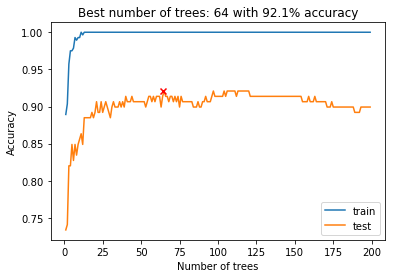

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#Plot train and test result
plt.plot(gs_results['number of estimators'], gs_results['train_accuracy'], label='train')
plt.plot(gs_results['number of estimators'], gs_results['test_accuracy'], label='test')

# Add marker for best score
best_k = gs_results['test_accuracy'].idxmax()
plt.scatter(best_k, gs_results['test_accuracy'].max(), marker='x', c='red', zorder=10)

plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend(),
plt.title('Best number of trees: {} with {:.1f}% accuracy'.format(best_k, 100*gs_results['test_accuracy'][best_k]));

In [4]:
# Random forest
rf_best = RandomForestClassifier(n_estimators=106, max_depth=None, random_state=0)
rf_best.fit(X_tr, y_tr)

test_acurracy = rf_best.score(X_te, y_te)
rf_test_score = pd.DataFrame(data = {'model': ["random forest"], 'test_accuracy': [test_acurracy]})
%store rf_test_score

Stored 'rf_test_score' (DataFrame)


It seems that the number of trees increase the accuracy until 50 and then stagnates or even decreases.

## Support Vector Machines

Here with the support vector machines, we try to find the separation with the maximum margin around it, by minimizing the [hinge loss](https://en.wikipedia.org/wiki/Hinge_loss). Sometimes, The linear SVMs can be too rigid when there are nonlinear relationships between the variables. In thoses cases, we use the __kernel trick__ that basically add new features to better interpret the data. Let's see which one performs better.

In [5]:
from sklearn.svm import LinearSVC

# Create SVM with linear kernel
linear_svc = LinearSVC()

# Fit estimator
linear_svc.fit(X_tr, y_tr)

# Accuracy on test set
accuracy = linear_svc.score(X_va, y_va)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.928


### Support vector machines with RBF Kernel

In [6]:
from sklearn.svm import SVC

# Create SVM with RBF kernel
rbf_svc_c1 = SVC(kernel='rbf', C=1, gamma='auto')

# Fit estimator
rbf_svc_c1.fit(X_tr, y_tr)
accuracy2 = rbf_svc_c1.score(X_va, y_va)
print('Accuracy: {:.3f}'.format(accuracy2))

Accuracy: 0.928


Here, the RBF Kernel doesn't improve the accuracy. Again, pre-trained model already modified the data in such manner that it has already learned a lot from the data. Indeed, it learned from several millions of images. Learning just from our small dataset of images is not enough to hope to have better results.

In [7]:
# Store the accuracy
test_acurracy = linear_svc.score(X_te, y_te)
svm_linear_test_score = pd.DataFrame(data = {'model': ["svm linear"], 'test_accuracy': [test_acurracy]})
%store svm_linear_test_score

test_acurracy = rbf_svc_c1.score(X_te, y_te)
svm_rbf_test_score = pd.DataFrame(data = {'model': ["svm rbf"], 'test_accuracy': [test_acurracy]})
%store svm_rbf_test_score

Stored 'svm_linear_test_score' (DataFrame)
Stored 'svm_rbf_test_score' (DataFrame)
